## Problem Statement

# Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

### Data Loading

In [ ]:
# Read the hour.csv file
bikes_hour_df = pd.read_csv('hour.csv')

print the first five rows of dataset

In [ ]:
bikes_hour_df[:5]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [ ]:
bikes_hour_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

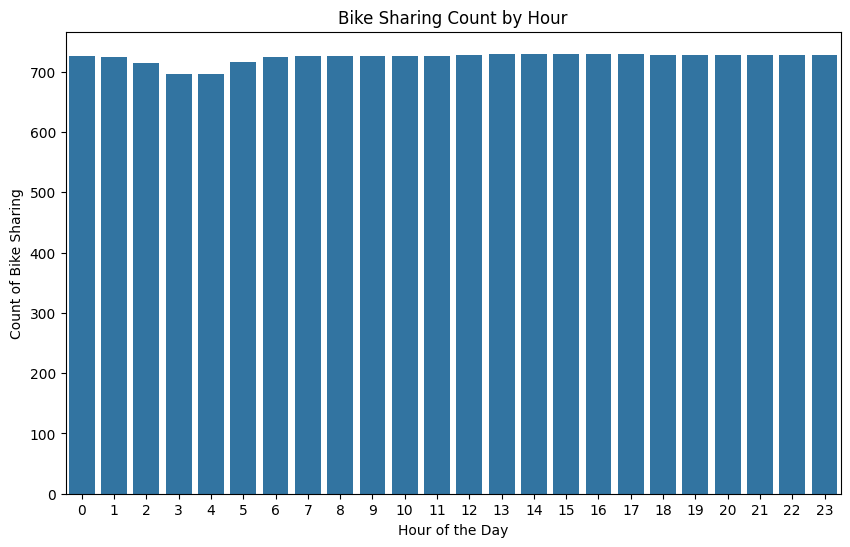

,count
hr,
17,730
16,730
13,729
15,729
14,729


In [ ]:
# Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing
plt.figure(figsize=(10, 6))
sns.countplot(x='hr', data=bikes_hour_df)
plt.title('Bike Sharing Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Bike Sharing')
plt.show()

# Find the busy hours
busy_hours = bikes_hour_df['hr'].value_counts().head(5)
busy_hours

#### Visualize the distribution of count, casual and registered variables

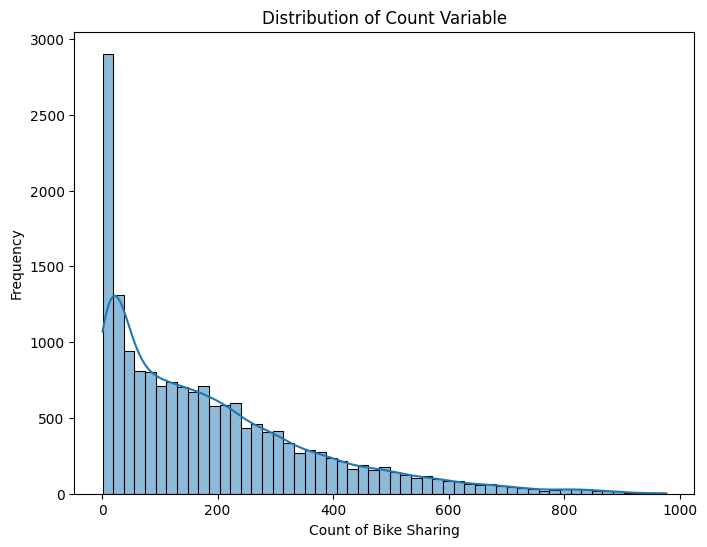

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(bikes_hour_df['cnt'], kde=True)
plt.title('Distribution of Count Variable')
plt.xlabel('Count of Bike Sharing')
plt.ylabel('Frequency')
plt.show()

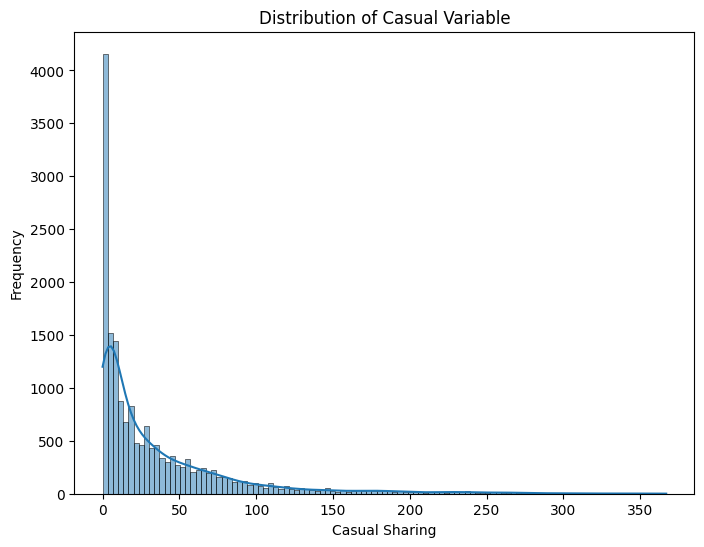

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(bikes_hour_df['casual'], kde=True)
plt.title('Distribution of Casual Variable')
plt.xlabel('Casual Sharing')
plt.ylabel('Frequency')
plt.show()

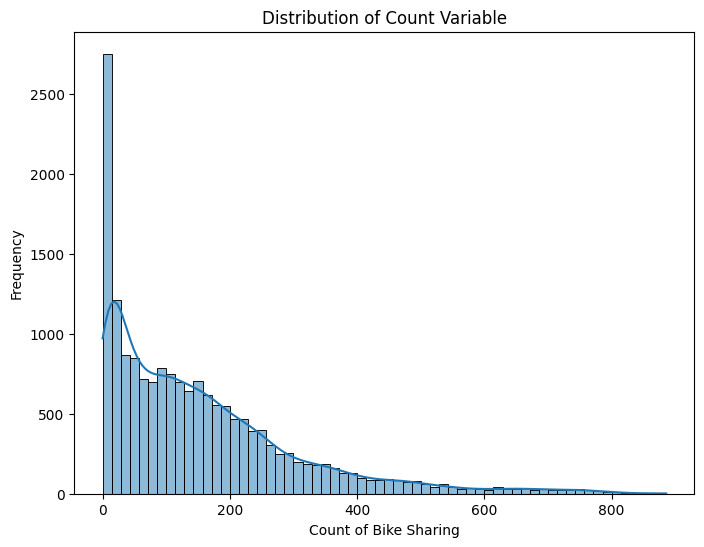

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(bikes_hour_df['registered'], kde=True)
plt.title('Distribution of Count Variable')
plt.xlabel('Count of Bike Sharing')
plt.ylabel('Frequency')
plt.show()

#### Describe the relation of weekday, holiday and working day

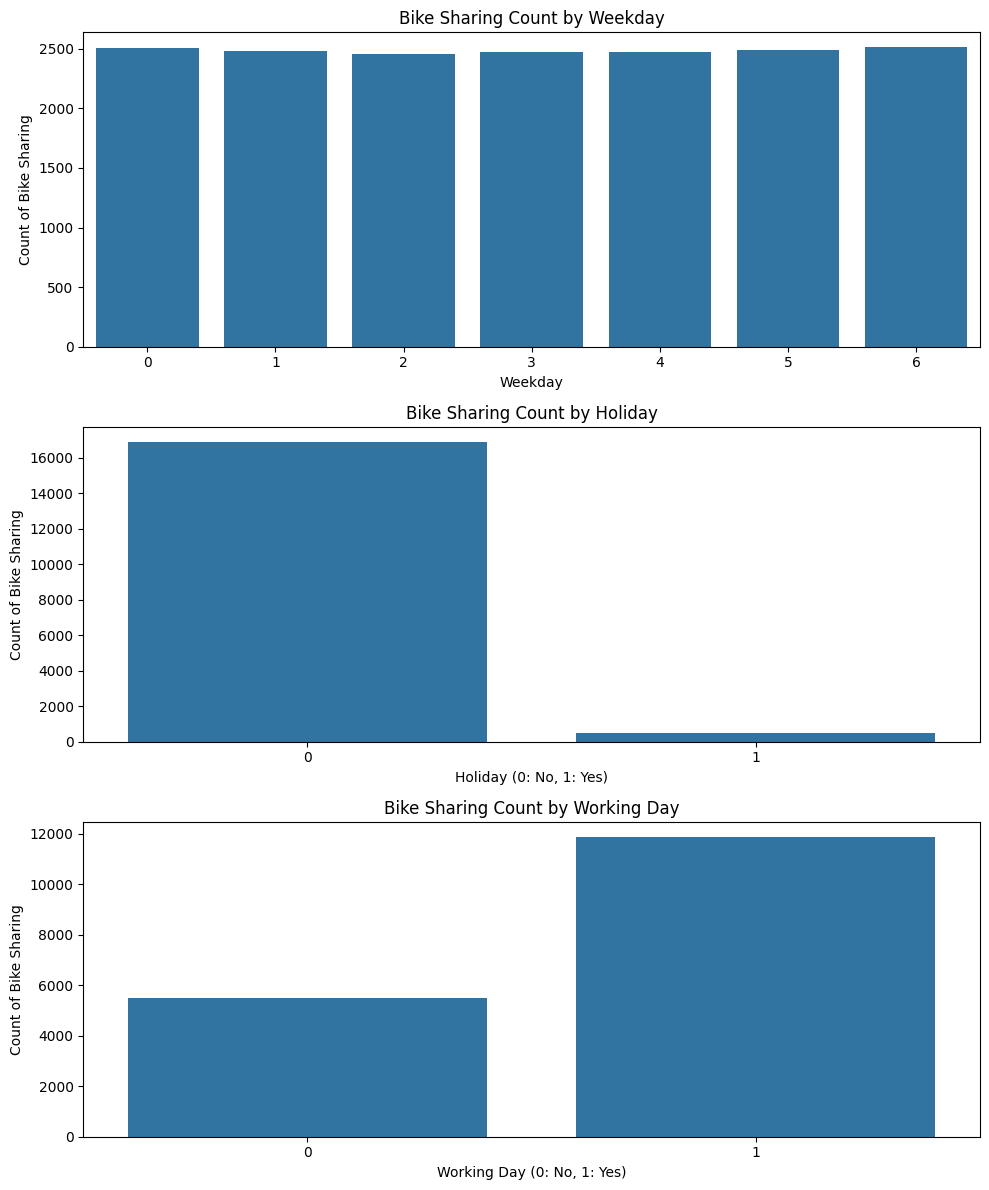

Weekday vs Holiday Relation:
 holiday     0    1
weekday           
0        2502    0
1        2122  357
2        2430   23
3        2451   24
4        2423   48
5        2439   48
6        2512    0 

Weekday vs Workingday Relation:
 workingday     0     1
weekday               
0           2502     0
1            357  2122
2             23  2430
3             24  2451
4             48  2423
5             48  2439
6           2512     0 

Holiday vs Workingday Relation:
 workingday     0      1
holiday                
0           5014  11865
1            500      0


In [ ]:
# Describe the relation of weekday, holiday and working day
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

sns.countplot(x='weekday', data=bikes_hour_df, ax=axes[0])
axes[0].set_title('Bike Sharing Count by Weekday')
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Count of Bike Sharing')

sns.countplot(x='holiday', data=bikes_hour_df, ax=axes[1])
axes[1].set_title('Bike Sharing Count by Holiday')
axes[1].set_xlabel('Holiday (0: No, 1: Yes)')
axes[1].set_ylabel('Count of Bike Sharing')

sns.countplot(x='workingday', data=bikes_hour_df, ax=axes[2])
axes[2].set_title('Bike Sharing Count by Working Day')
axes[2].set_xlabel('Working Day (0: No, 1: Yes)')
axes[2].set_ylabel('Count of Bike Sharing')

plt.tight_layout()
plt.show()

# Relation analysis
weekday_holiday_relation = pd.crosstab(bikes_hour_df['weekday'], bikes_hour_df['holiday'])
print("Weekday vs Holiday Relation:\n", weekday_holiday_relation, "\n")

weekday_workingday_relation = pd.crosstab(bikes_hour_df['weekday'], bikes_hour_df['workingday'])
print("Weekday vs Workingday Relation:\n", weekday_workingday_relation, "\n")

holiday_workingday_relation = pd.crosstab(bikes_hour_df['holiday'], bikes_hour_df['workingday'])
print("Holiday vs Workingday Relation:\n", holiday_workingday_relation)

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

<ipython-input-206-b5e585868c77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_2011['month'] = pd.to_datetime(bikes_2011['dteday']).dt.month


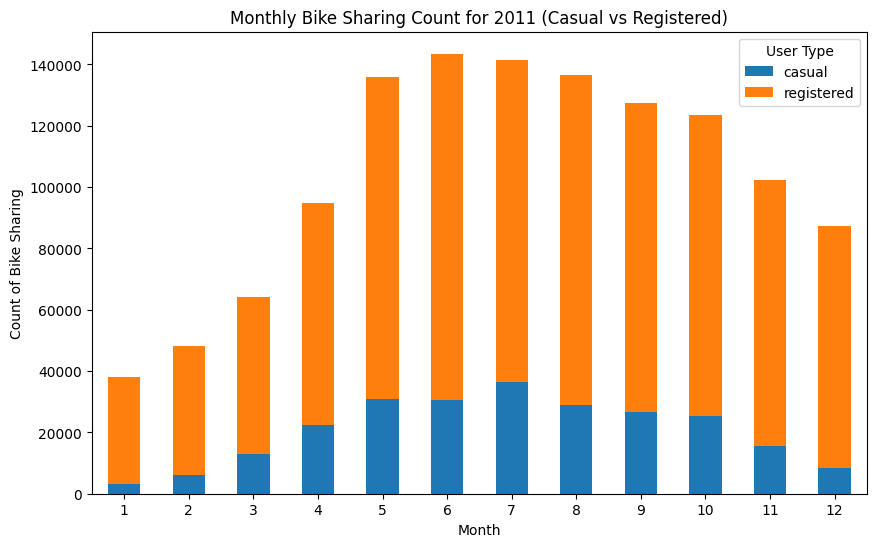

In [ ]:
# stacked bar chart for year 2011
bikes_2011 = bikes_hour_df[pd.to_datetime(bikes_hour_df['dteday']).dt.year == 2011]
bikes_2011['month'] = pd.to_datetime(bikes_2011['dteday']).dt.month
monthly_counts_2011 = bikes_2011.groupby('month')[['casual', 'registered']].sum()

monthly_counts_2011.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Monthly Bike Sharing Count for 2011 (Casual vs Registered)')
plt.xlabel('Month')
plt.ylabel('Count of Bike Sharing')
plt.xticks(rotation=0)
plt.legend(title='User Type')
plt.show()

<ipython-input-207-e5312f249e57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_2012['month'] = pd.to_datetime(bikes_2012['dteday']).dt.month


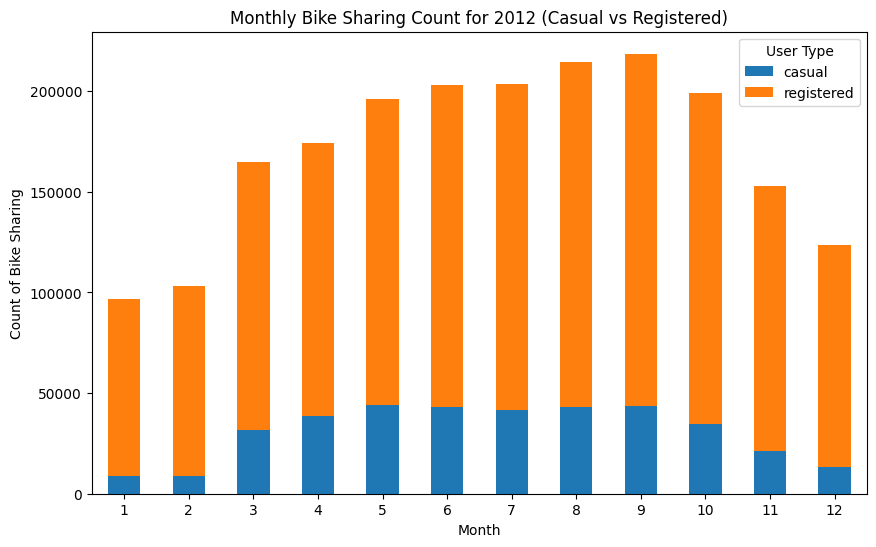

In [ ]:
# stacked bar chart for year 2012
bikes_2012 = bikes_hour_df[pd.to_datetime(bikes_hour_df['dteday']).dt.year == 2012]
bikes_2012['month'] = pd.to_datetime(bikes_2012['dteday']).dt.month
monthly_counts_2012 = bikes_2012.groupby('month')[['casual', 'registered']].sum()

monthly_counts_2012.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Monthly Bike Sharing Count for 2012 (Casual vs Registered)')
plt.xlabel('Month')
plt.ylabel('Count of Bike Sharing')
plt.xticks(rotation=0)
plt.legend(title='User Type')
plt.show()

#### Analyze the correlation between features with heatmap

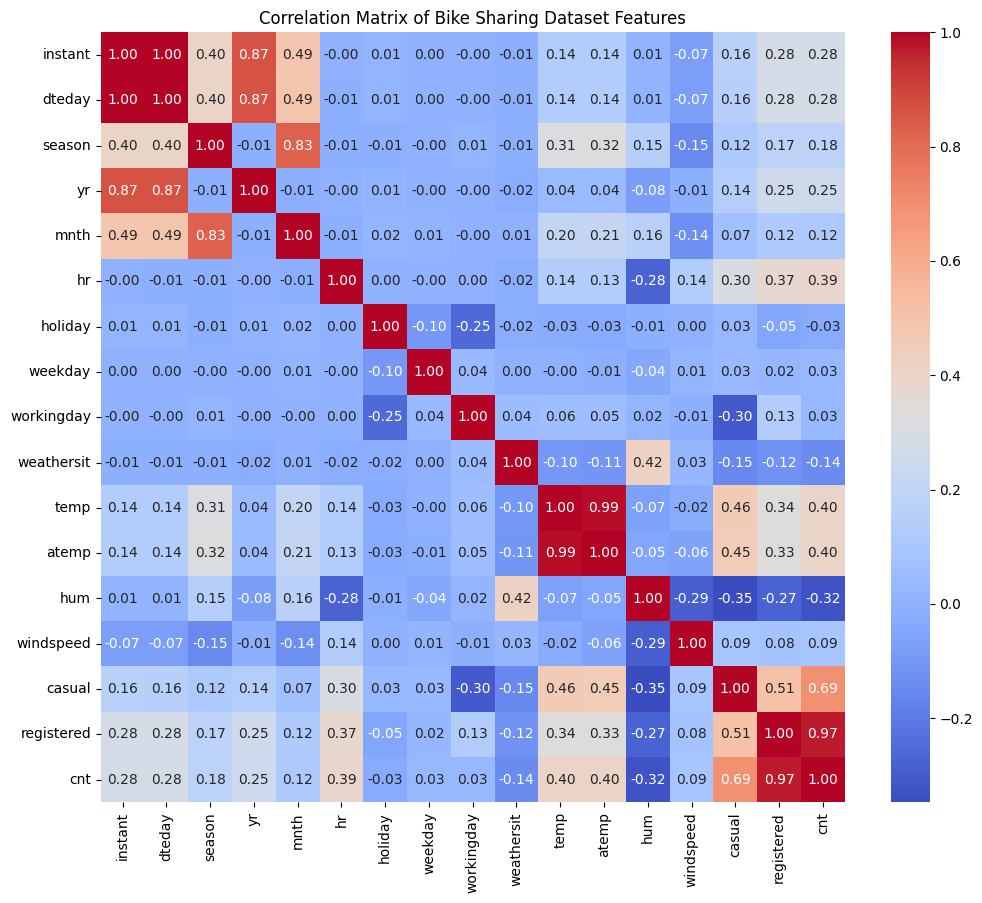

In [ ]:
# Calculate the correlation matrix
bikes_hour_df['dteday'] = pd.to_datetime(bikes_hour_df['dteday'])

correlation_matrix = bikes_hour_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bike Sharing Dataset Features')
plt.show()

#### Visualize the box plot of casual and registered variables to check the outliers

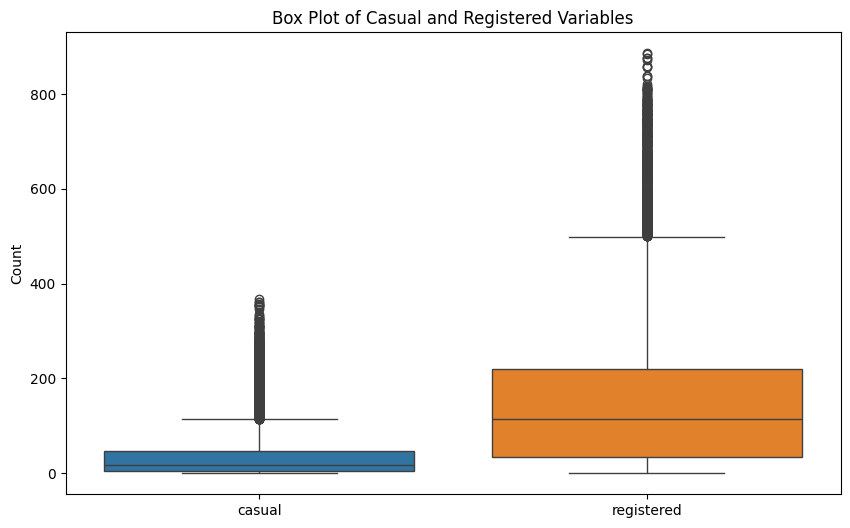

In [ ]:
# Visualize the box plot of casual and registered variables to check the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=bikes_hour_df[['casual', 'registered']])
plt.title('Box Plot of Casual and Registered Variables')
plt.ylabel('Count')
plt.show()

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [ ]:
# Drop unwanted columns
bikes_hour_df = bikes_hour_df.drop(['instant', 'casual', 'registered', 'dteday'], axis=1)

#### Identify categorical and continuous variables


In [ ]:
# Identify categorical and continuous variables
categorical_vars = ['season', 'holiday', 'workingday', 'weathersit']
continuous_vars = ['hr', 'temp', 'atemp', 'hum', 'windspeed']

#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [ ]:
# Feature scaling
scaler = MinMaxScaler()
bikes_hour_df[continuous_vars] = scaler.fit_transform(bikes_hour_df[continuous_vars])

#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [ ]:
# Apply one-hot encode on the categorical data
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(bikes_hour_df[categorical_vars])
encoded_feature_names = encoder.get_feature_names_out(categorical_vars)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
bikes_hour_df = pd.concat([bikes_hour_df.drop(categorical_vars, axis=1), encoded_df], axis=1)

#### Specify features and targets after applying scaling and one-hot encoding

In [ ]:
X = bikes_hour_df.drop('cnt', axis=1)
y = bikes_hour_df['cnt']

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
# Select the features and target and split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
# Implementation using Normal Equation
X_train_with_intercept = np.concatenate((np.ones((X_train.shape[0], 1)), X_train.values.astype(float)), axis=1)  # Convert X_train to float
theta_best = np.linalg.lstsq(X_train_with_intercept, y_train, rcond=None)[0]
print("Coefficients from Normal Equation:", theta_best)

Coefficients from Normal Equation: [-3.73733229e+00  8.13358173e+01  2.20631889e-01  1.72506301e+02
  1.87988399e+00  2.55538864e+02  1.03674616e+02 -1.92238809e+02
  2.35402331e+01 -2.01028419e+01 -4.94890275e-02 -2.69513329e+01
  4.33663315e+01  1.14738309e+01 -1.52111632e+01 -3.36507338e+00
 -3.72258915e-01 -6.99397392e+00  1.02917104e+00 -3.30907153e+01
  3.53181859e+01]


#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a)

In [ ]:
def batch_gradient_descent(X, y, learning_rate, iterations):
    m = len(y)  # Number of training examples
    X = np.concatenate((np.ones((m, 1)), X), axis=1)  # Add intercept term
    theta = np.zeros(X.shape[1])  # Initialize coefficients
    costs = []

    for _ in range(iterations):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = (1/m) * X.T.dot(error)
        theta = theta - learning_rate * gradient
        cost = (1/(2*m)) * np.sum(error**2)
        costs.append(cost)
    return theta
iterations = 1500
learning_rate = 0.01
theta_bgd = batch_gradient_descent(X_train.values, y_train.values, learning_rate, iterations)
print("Coefficients from Batch Gradient Descent:", theta_bgd)

Coefficients from Batch Gradient Descent: [ 3.83055742e+00  8.50936076e+01  1.26936471e+00  1.58639094e+02
  1.75886053e+00  8.73423320e+01  7.57197851e+01 -9.65826390e+01
  2.62241323e+01 -4.68847392e+01  1.66875744e+01  1.64570383e+01
  1.75706839e+01  8.43859159e+00 -4.60803418e+00 -1.30732600e+00
  5.13788341e+00  2.13464391e+01  1.20833040e+01 -2.96041431e+01
  4.95741913e-03]


#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# Implement the linear regression model using sklearn
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Linear Regression:", mse)

Mean Squared Error for Linear Regression: 19021.298354215327


#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
# Calculate the R2 (coefficient of determination) of the actual and predicted data
r2 = r2_score(y_test, y_pred)
print("R-squared for Linear Regression:", r2)

R-squared for Linear Regression: 0.39930360758282946


#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

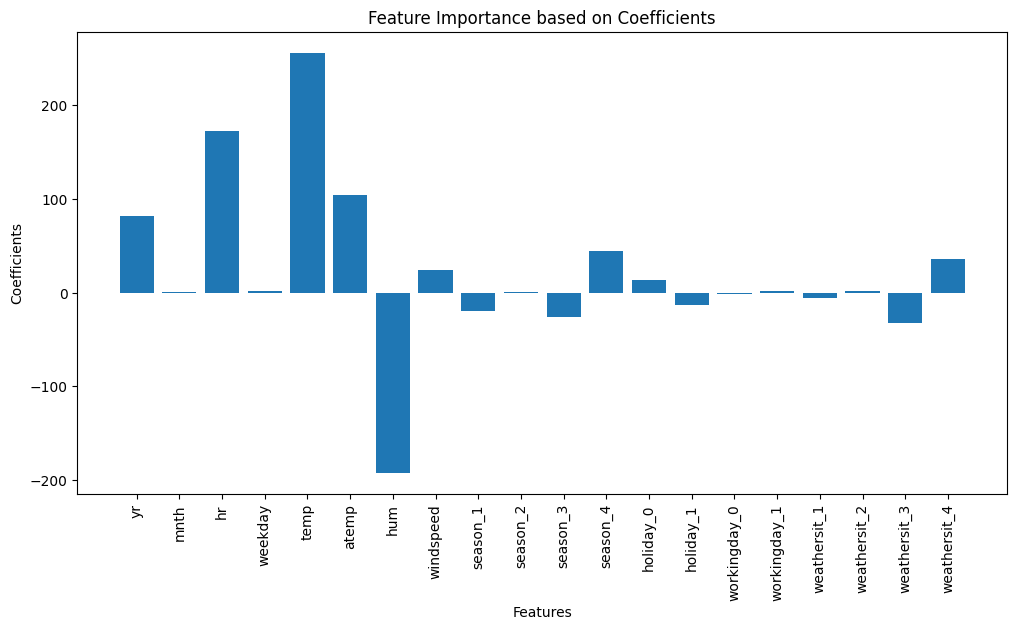

In [ ]:
# Summarize the importance of features
coefficients = lr_model.coef_
feature_names = X.columns
plt.figure(figsize=(12, 6))
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature Importance based on Coefficients')
plt.xticks(rotation=90)
plt.show()

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

Best alpha for Lasso: 0.0001
Minimum MSE for Lasso: 19021.317132905962


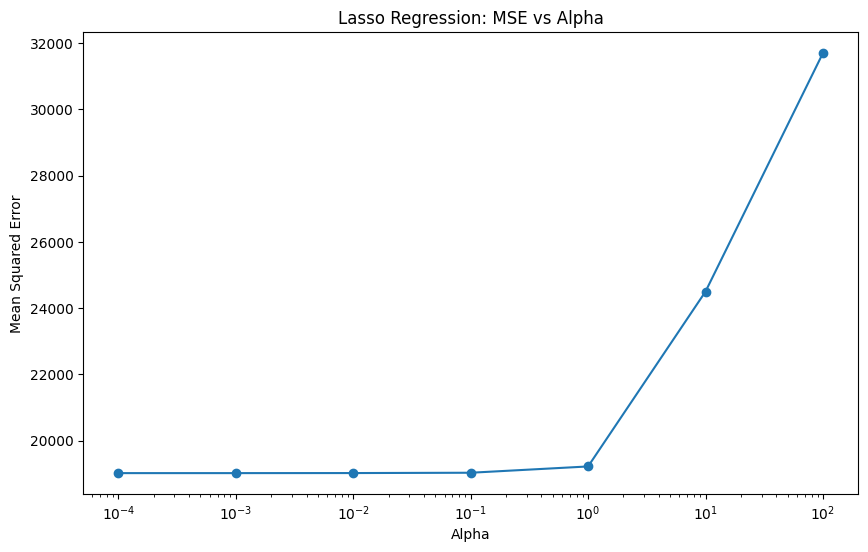

In [ ]:
# Apply Lasso regression
lasso_errors = []
lasso_coefs = []
for a in alpha:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    lasso_errors.append(mse_lasso)
    lasso_coefs.append(lasso.coef_)

best_alpha_lasso = alpha[np.argmin(lasso_errors)]
print("Best alpha for Lasso:", best_alpha_lasso)
print("Minimum MSE for Lasso:", np.min(lasso_errors))

plt.figure(figsize=(10, 6))
plt.plot(alpha, lasso_errors, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: MSE vs Alpha')
plt.show()

#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

Best alpha for Ridge: 1
Minimum MSE for Ridge: 19020.24969201565


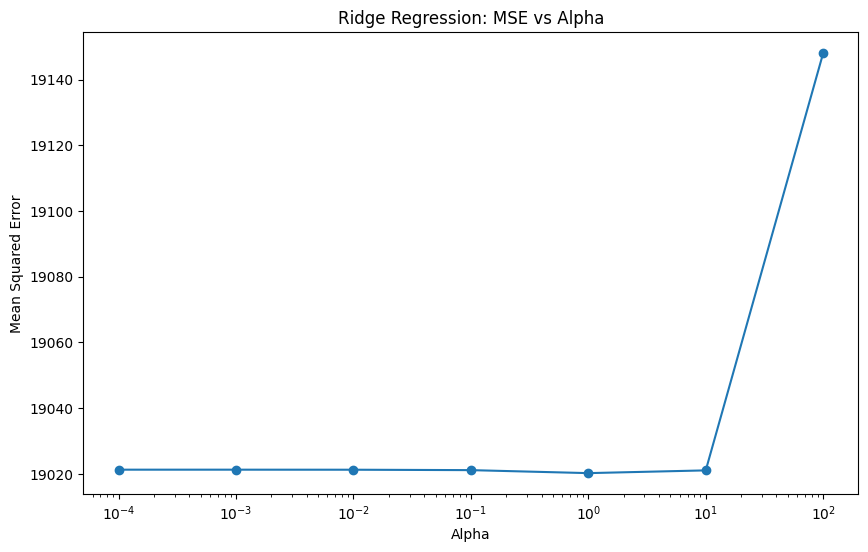

In [ ]:
# Apply Ridge regression
ridge_errors = []
ridge_coefs = []
for a in alpha:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    ridge_errors.append(mse_ridge)
    ridge_coefs.append(ridge.coef_)

best_alpha_ridge = alpha[np.argmin(ridge_errors)]
print("Best alpha for Ridge:", best_alpha_ridge)
print("Minimum MSE for Ridge:", np.min(ridge_errors))

plt.figure(figsize=(10, 6))
plt.plot(alpha, ridge_errors, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: MSE vs Alpha')
plt.show()

#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.358e+08, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e+08, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.250e+05, tolerance: 4.616e

Best alpha for Elasticnet: 0.001
Best l1_ratio for Elasticnet: 0.7
Minimum MSE for Elasticnet: 19019.48238158378


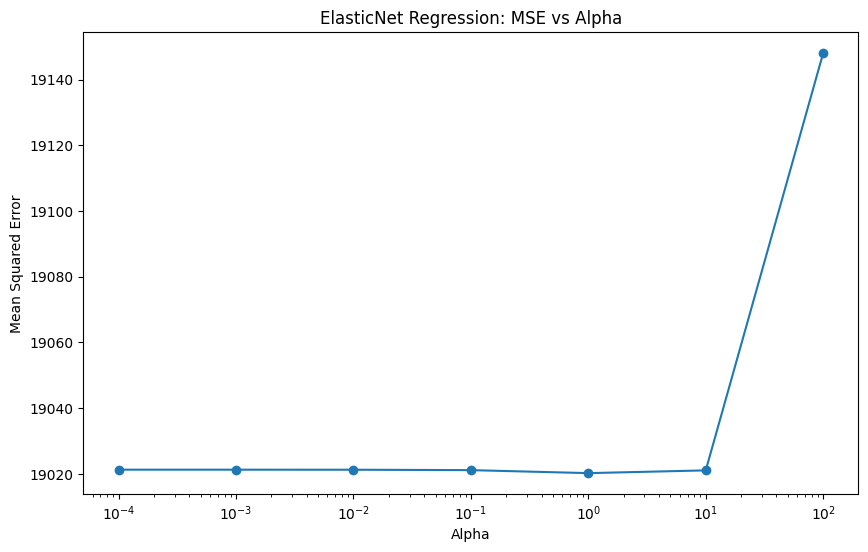

In [ ]:
# Apply Elasticnet regression
elasticnet_errors = []
elasticnet_coefs = []
l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
best_l1_ratio = None
best_alpha_elasticnet = None
min_mse_elasticnet = float('inf')

for l1 in l1_ratios:
    for a in alpha:
        elasticnet = linear_model.ElasticNet(alpha=a, l1_ratio=l1)
        elasticnet.fit(X_train, y_train)
        y_pred_elasticnet = elasticnet.predict(X_test)
        mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
        elasticnet_errors.append(mse_elasticnet)
        elasticnet_coefs.append(elasticnet.coef_)
        if mse_elasticnet < min_mse_elasticnet:
            min_mse_elasticnet = mse_elasticnet
            best_l1_ratio = l1
            best_alpha_elasticnet = a

print("Best alpha for Elasticnet:", best_alpha_elasticnet)
print("Best l1_ratio for Elasticnet:", best_l1_ratio)
print("Minimum MSE for Elasticnet:", min_mse_elasticnet)
plt.figure(figsize=(10, 6))
plt.plot(alpha, ridge_errors, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('ElasticNet Regression: MSE vs Alpha')
plt.show()

### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

In [ ]:
# Determine if there is a reduction in error if two target variables are considered
bikes_hour_df_orig = pd.read_csv('hour.csv')
bikes_hour_df_orig = bikes_hour_df_orig.drop(['instant'], axis=1)

# Feature scaling for continuous variables
bikes_hour_df_orig[continuous_vars] = scaler.fit_transform(bikes_hour_df_orig[continuous_vars])

# One-hot encode categorical variables
encoded_features_orig = encoder.transform(bikes_hour_df_orig[categorical_vars])
encoded_df_orig = pd.DataFrame(encoded_features_orig, columns=encoded_feature_names)
bikes_hour_df_orig = pd.concat([bikes_hour_df_orig.drop(categorical_vars, axis=1), encoded_df_orig], axis=1)
bikes_hour_df_orig=bikes_hour_df_orig.drop('dteday',axis=1)
# Define features (X) and targets (y_casual, y_registered)
X_orig = bikes_hour_df_orig.drop(['cnt', 'casual', 'registered'], axis=1)
y_casual = bikes_hour_df_orig['casual']
y_registered = bikes_hour_df_orig['registered']

# Split data for casual users
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_orig, y_casual, test_size=0.2, random_state=42)

# Train and predict for casual users
lr_model_c = linear_model.LinearRegression()
lr_model_c.fit(X_train_c, y_train_c)
y_pred_c = lr_model_c.predict(X_test_c)
mse_c = mean_squared_error(y_test_c, y_pred_c)

# Split data for registered users
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_orig, y_registered, test_size=0.2, random_state=42)

# Train and predict for registered users
lr_model_r = linear_model.LinearRegression()
lr_model_r.fit(X_train_r, y_train_r)
y_pred_r = lr_model_r.predict(X_test_r)
mse_r = mean_squared_error(y_test_r, y_pred_r)

# Calculate the combined MSE
combined_mse = (mse_c + mse_r)/2

print("Mean Squared Error for Casual Predictions:", mse_c)
print("Mean Squared Error for Registered Predictions:", mse_r)
print("Combined Mean Squared Error for Casual and Registered Predictions:", combined_mse)

Mean Squared Error for Casual Predictions: 1212.781419472546
Mean Squared Error for Registered Predictions: 14591.013597485266
Combined Mean Squared Error for Casual and Registered Predictions: 7901.897508478905


### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
